In [454]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "terrorism-in-world"

In [455]:
library(psych)
library(dplyr)
library(ggplot2)

# **1. Data Import**

In [456]:
data <- read.csv('/kaggle/input/terrorism-in-world/terrorist-attacks new.csv', header=T)

**Data Check**

In [457]:
str(data)

'data.frame':	10517 obs. of  4 variables:
 $ Entity           : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Code             : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Year             : int  1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 ...
 $ Terrorist.attacks: int  0 0 0 1 0 0 0 0 0 3 ...


In [458]:
names(data) <- c('World','Code','Year','Terrorist.attacks')

In [459]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
World*,1,10517,110.51830,63.76845,111,110.448841,81.5430,1,221,220,0.003302878,-1.196342,0.6218132
Code*,2,10517,86.95598,61.97369,84,85.226738,83.0256,1,197,196,0.128908089,-1.264222,0.6043123
Year,3,10517,1996.22687,15.08947,1997,1996.372668,19.2738,1970,2021,51,-0.075216562,-1.214826,0.1471390
Terrorist.attacks,4,10517,76.82571,532.33606,0,5.148425,0.0000,0,16820,16820,16.335733166,348.735013,5.1908676


**Missing value check**

In [460]:
colSums(is.na(data))

World              Code              Year Terrorist.attacks 
                0                 0                 0                 0

In [461]:
summary(data)

    World               Code                Year      Terrorist.attacks 
 Length:10517       Length:10517       Min.   :1970   Min.   :    0.00  
 Class :character   Class :character   1st Qu.:1983   1st Qu.:    0.00  
 Mode  :character   Mode  :character   Median :1997   Median :    0.00  
                                       Mean   :1996   Mean   :   76.83  
                                       3rd Qu.:2009   3rd Qu.:    6.00  
                                       Max.   :2021   Max.   :16820.00  

---------------

# **2. Data Transform**

In [462]:
data$World <- as.factor(data$World)
data$Code<- as.factor(data$Code)

In [463]:
data$Years <- cut(data$Year, breaks = c(1960,1980,1990,2000,2010,2025), right= F,
                 labels = paste0(c(1970,1980,1990,2000,2010),'\'s'))

In [464]:
summary(data)

         World            Code           Year      Terrorist.attacks 
 Afghanistan:   51          :1254   Min.   :1970   Min.   :    0.00  
 Africa     :   51   AFG    :  51   1st Qu.:1983   1st Qu.:    0.00  
 Albania    :   51   AGO    :  51   Median :1997   Median :    0.00  
 Algeria    :   51   ALB    :  51   Mean   :1996   Mean   :   76.83  
 Andorra    :   51   AND    :  51   3rd Qu.:2009   3rd Qu.:    6.00  
 Angola     :   51   ARE    :  51   Max.   :2021   Max.   :16820.00  
 (Other)    :10211   (Other):9008                                    
    Years     
 1970's:1940  
 1980's:1940  
 1990's:1896  
 2000's:2149  
 2010's:2592  
              
              

----------------

# **3. Data Visualization**

**The number of terrorist incidents that occur each year.**

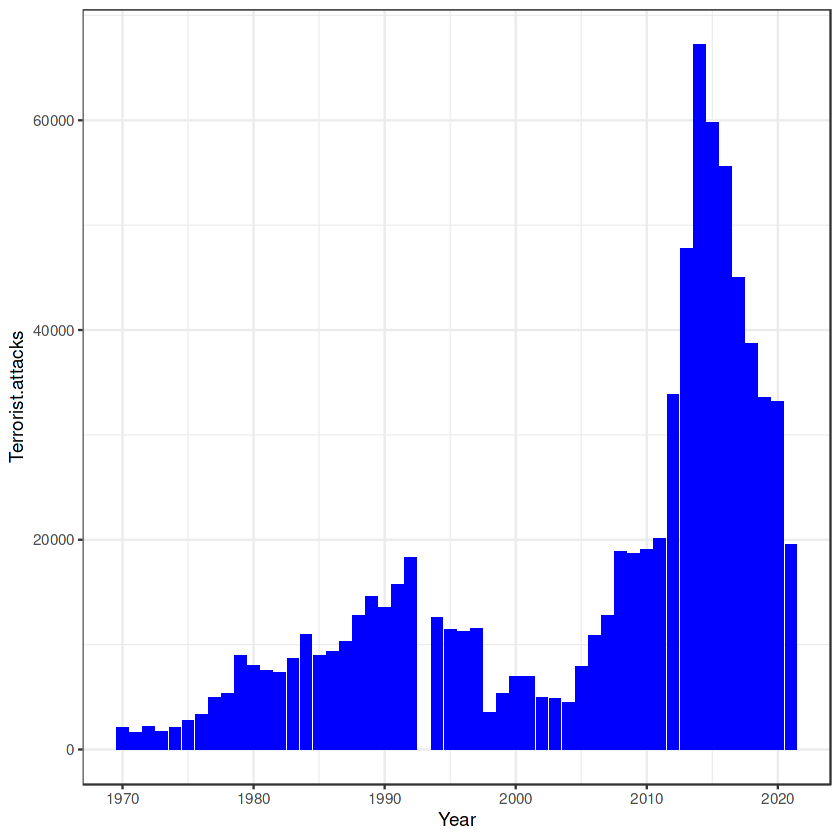

In [465]:
ggplot(data, aes(x= Year, y= Terrorist.attacks)) + 
    geom_col(fill = "blue") +
    theme_bw()

**Changes in the number of terrorist incidents by continent.**

**Number of terrorist incidents (10 years apart).**

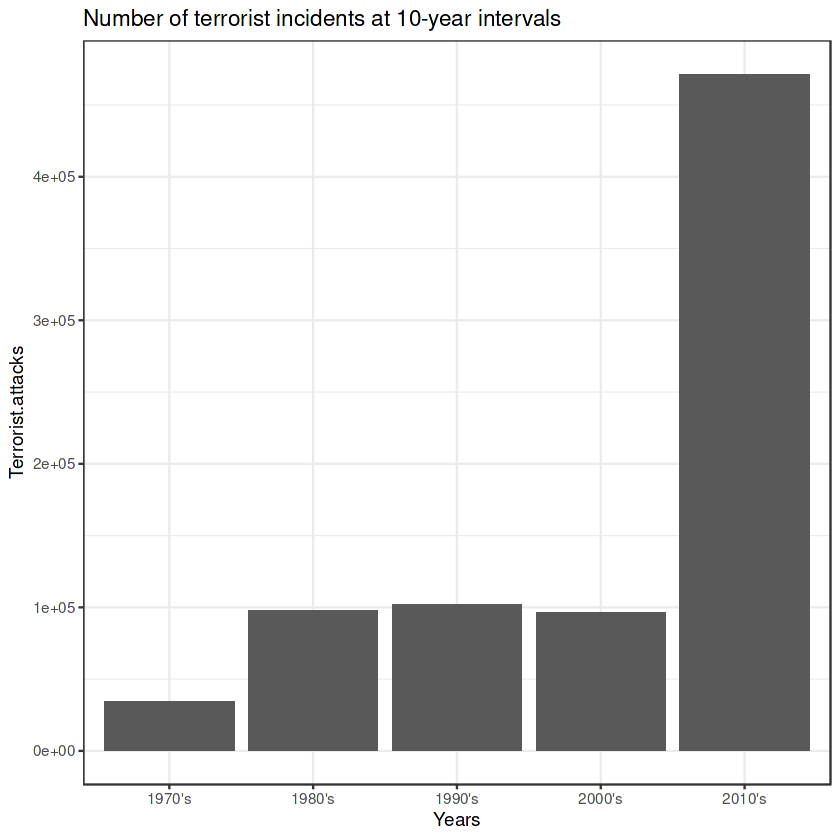

In [466]:
data_world_terror <- data  %>% 
                        group_by(World,Years)  %>% 
                            count(Terrorist.attacks)

ggplot(data_world_terror, aes(x= Years, y= Terrorist.attacks)) + 
            geom_col() +
            theme_bw() +
            ggtitle("Number of terrorist incidents at 10-year intervals")

--------------

In [467]:
Continent <- c('Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Central America & Caribbean')

In [468]:
data_world_terror2 <- data %>% filter(World %in% Continent) %>% 
                        group_by(World,Year)  %>% 
                            count(Terrorist.attacks)

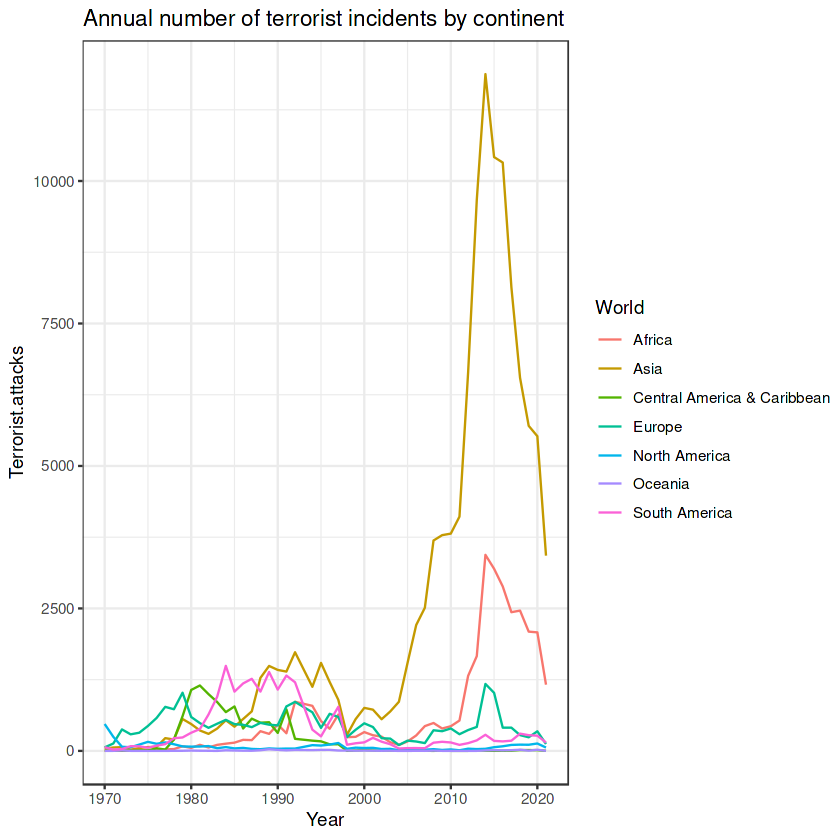

In [469]:
ggplot(data_world_terror2, aes(x=Year, y= Terrorist.attacks, color = World)) + 
            geom_line() +
            theme_bw()+
            ggtitle("Annual number of terrorist incidents by continent")

**Asia has the highest number of terrorist attacks.**
**Terrorism increased dramatically in the 2010s.**

---------------------

**Code for the country with the highest average number of terrorist attacks.**

In [470]:
tmp <- data %>% group_by(Code) %>% filter(Code != ''& Code != 'OWID_WRL') %>% 
                    summarize(avg_terror = round(mean(Terrorist.attacks, na.rm=T))) %>% arrange(desc(avg_terror))
code_avg_terror <- tmp[1:10,]

In [471]:
code_avg_terror

Code,avg_terror
<fct>,<dbl>
IRQ,550
AFG,399
PAK,307
IND,278
COL,176
PHL,164
YEM,124
PER,120
NGA,118


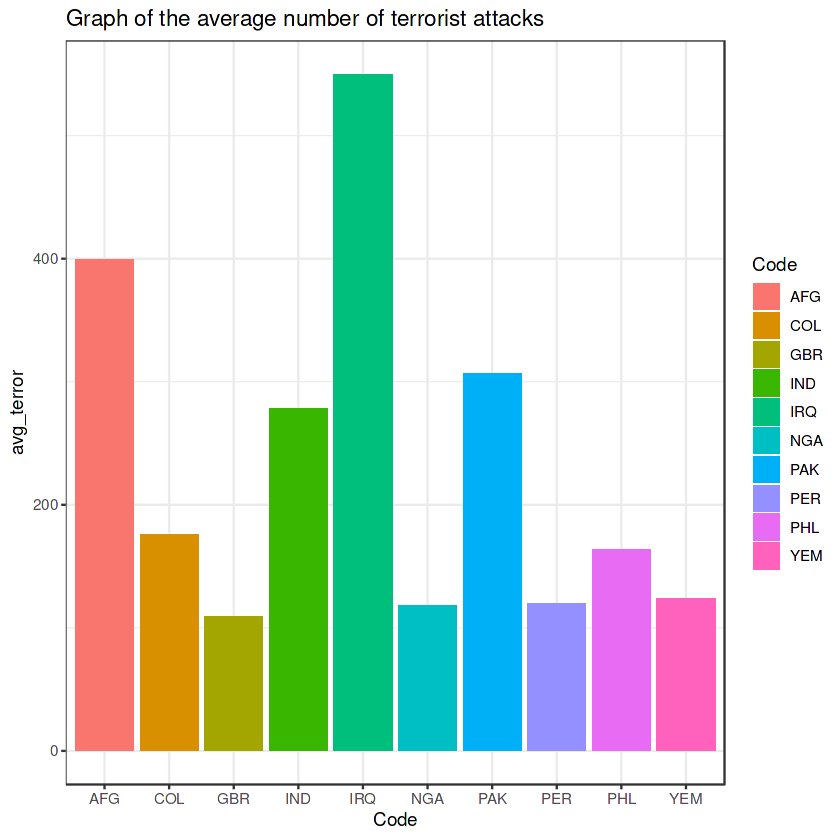

In [472]:
ggplot(code_avg_terror, aes(x=Code, y= avg_terror, fill = Code)) + 
            geom_col() +
            theme_bw()+
            ggtitle("Graph of the average number of terrorist attacks")

**Country code with the most terrorist attacks.**

In [473]:
tmp <- data %>% group_by(Code) %>% filter(Code != ''& Code != 'OWID_WRL') %>% 
                    summarize(sum_terror = sum(Terrorist.attacks, na.rm=T)) %>% arrange(desc(sum_terror))
top_terror <- tmp[1:10,]

In [474]:
top_terror

Code,sum_terror
<fct>,<int>
IRQ,28068
AFG,20373
PAK,15654
IND,14164
COL,8991
PHL,8375
YEM,6317
PER,6116
NGA,5998


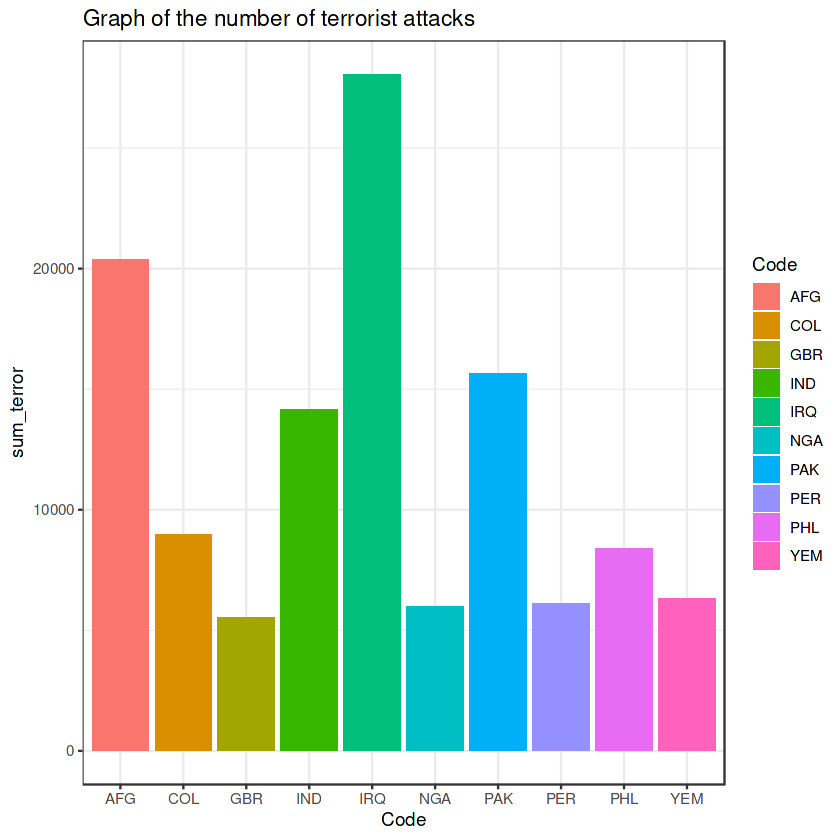

In [475]:
ggplot(top_terror, aes(x=Code, y= sum_terror, fill = Code)) + 
            geom_col() +
            theme_bw()+
            ggtitle("Graph of the number of terrorist attacks")

--------------

**Changes in the number of terrorist attacks in Iraq.**

In [476]:
irq_terror_change <- data %>% filter(Code == 'IRQ') %>% 
                        group_by(World, Year)  %>% 
                            count(Terrorist.attacks)

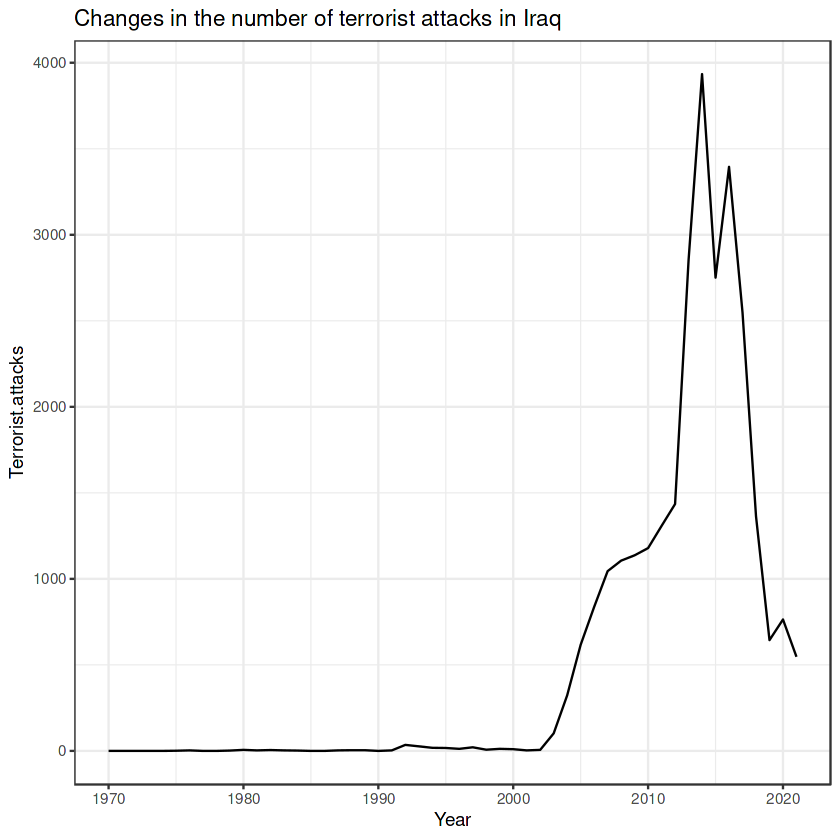

In [477]:
ggplot(irq_terror_change, aes(x=Year, y= Terrorist.attacks)) + 
            geom_line() +
            theme_bw()+
            ggtitle("Changes in the number of terrorist attacks in Iraq")

-------------------

**Thank You.**